In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

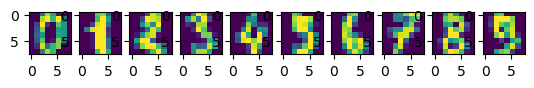

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [3]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [4]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6606922126081582


In [5]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

0.8222222222222222
0.8222222222222222
0.8222222222222222
0.8888888888888888
0.8333333333333334
0.9
0.8555555555555555
0.8888888888888888
0.8555555555555555
0.8777777777777778
0.7888888888888889
0.8444444444444444
0.8111111111111111
0.8666666666666667
0.9222222222222223
0.8444444444444444
0.8
0.8555555555555555
0.8888888888888888
0.9
0.8444444444444444
0.8777777777777778
0.8777777777777778
0.9
0.8888888888888888
0.8555555555555555
0.8666666666666667
0.9
0.8
0.8777777777777778
0.8888888888888888
0.9
0.8555555555555555
0.8555555555555555
0.8666666666666667
0.8666666666666667
0.7777777777777778
0.7666666666666667
0.8666666666666667
0.8333333333333334
0.8444444444444444
0.8555555555555555
0.8666666666666667
0.8444444444444444
0.8444444444444444
0.8666666666666667
0.8111111111111111
0.8111111111111111
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8555555555555555
0.8222222222222222
0.8
0.8444444444444444
0.8333333333333334
0.9111111111111111
0.8333333333333334

In [6]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

In [7]:
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

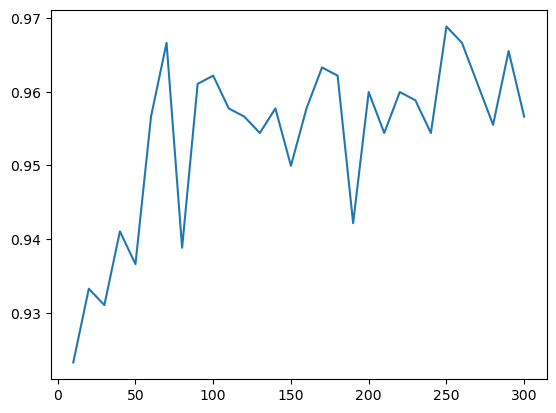

In [8]:
N = 30
accuracy = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))

import matplotlib.pyplot as plt
plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

In [9]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

from sklearn.model_selection import GridSearchCV
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.9365962180200222
max_samples: 0.8
max_features: 0.6


In [10]:
digits = load_digits()
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [12]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9079110012360939


In [13]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.6749072929542645
Bagging (200 arbres) : 0.8992583436341162
Forêt aléatoire (200 arbres) : 0.9264524103831892


In [14]:
N = 10

bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))

print(np.mean(bagging_accuracies), np.std(bagging_accuracies))


rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))

0.9291434927697442 0.012436915564127387
0.9611790878754171 0.006040566844220438


10 0.9276974416017798
20 0.9555061179087876
30 0.9610678531701891
40 0.9655172413793104
50 0.9688542825361512
60 0.9666295884315906
70 0.9710789766407119
80 0.9666295884315906
90 0.9744160177975528
100 0.9777530589543938
110 0.9710789766407119
120 0.9688542825361512
130 0.9688542825361512
140 0.9710789766407119
150 0.9710789766407119
160 0.9744160177975528
170 0.9710789766407119
180 0.9733036707452726
190 0.9744160177975528
200 0.9744160177975528
210 0.9699666295884316
220 0.9721913236929922
230 0.9744160177975528
240 0.9733036707452726
250 0.9733036707452726
260 0.9721913236929922
270 0.9766407119021134
280 0.9755283648498332
290 0.9733036707452726
300 0.9733036707452726


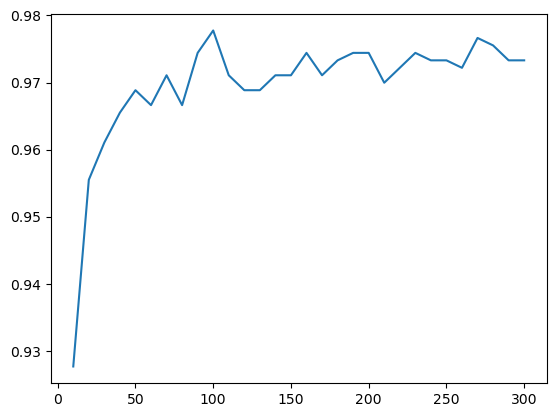

In [15]:
N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

import numpy as np
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print("Forêt aléatoire : " + str(accuracy))

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees : " + str(accuracy))

Forêt aléatoire : 0.9588431590656284
Extra Trees : 0.9777530589543938


In [18]:
from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.899876390605686
